# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [2]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [18]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [19]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [20]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [21]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [22]:
#roulette wheel이용해서 selection. population length만큼 선택하기.
def selection(popRank):
    selected = []
    df = pd.DataFrame(popRank,columns=['Index','Fitness'])
    df['cum_sum']=df['Fitness'].cumsum()
    df['cum_perc']=df['cum_sum']*100/df['Fitness'].sum()
    for i in range(len(popRank)):
        pick = random.random()*100
        for k in range(len(popRank)):
            if pick < df.iloc[k,3]:
                selected.append(popRank[k])
                break
    return selected
                
        
    

In [23]:
#selection 결과 바탕으로 matingpool형성
def matingpool(selected,population):
    #population에서 룰렛휠로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [24]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [25]:
def breedpopulation(pool):
    breedpop = []
    for i in range(len(pool)):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [26]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [27]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [28]:
def nextGeneration(population,mutationrate):
    rank = rankRoutes(population)
    selected = selection(rank)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [29]:
def GeneticAlgorithm(cityList,popSize,mutationrate,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,mutationrate)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    print(bestroute)
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    

In [30]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [31]:
cityList

[(84,49),
 (59,39),
 (47,39),
 (35,23),
 (30,89),
 (35,59),
 (55,84),
 (57,79),
 (93,100),
 (81,69),
 (46,83),
 (19,67),
 (63,71),
 (56,62),
 (38,16),
 (55,17),
 (6,79),
 (93,58),
 (72,39),
 (60,36),
 (49,92),
 (98,61),
 (5,52),
 (28,20),
 (48,92),
 (95,60),
 (74,40),
 (26,95),
 (96,14),
 (80,94),
 (5,13),
 (11,62),
 (17,83),
 (4,84),
 (96,62)]

First Distance :1523.1681978222068
Final Distance :1207.3464976325517
Time :27.872872591018677
[(17,83), (6,79), (46,83), (96,14), (74,40), (84,49), (98,61), (95,60), (59,39), (35,23), (38,16), (56,62), (48,92), (80,94), (93,58), (96,62), (63,71), (81,69), (55,84), (60,36), (47,39), (72,39), (55,17), (93,100), (19,67), (5,52), (11,62), (49,92), (57,79), (30,89), (4,84), (35,59), (26,95), (28,20), (5,13)]


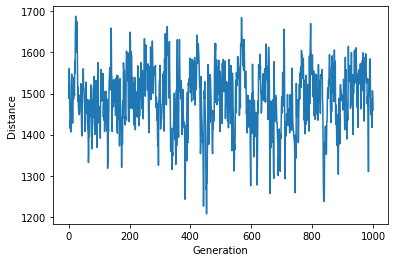

In [32]:
GeneticAlgorithm(cityList,50,0.00000001,1000)